In [7]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

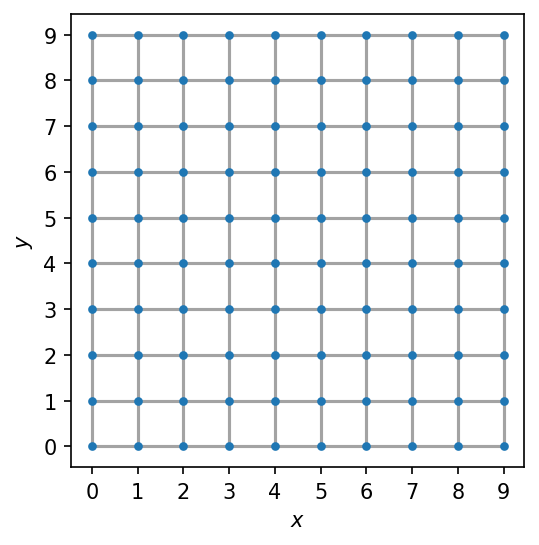

In [8]:
N = 10
lattice = SquareLattice(N, "open")

lattice.plot()
num_sites = lattice.get_num_sites()

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()

[-4.93267906 -4.93267906 -4.83356875 -4.83356875 -4.83332672 -4.83332672
 -4.7351242  -4.7351242  -4.67341611 -4.67341611 -4.67340858 -4.67340858
 -4.57714093 -4.57714093 -4.57588327 -4.57588327 -4.46086948 -4.46086948
 -4.46069029 -4.46069029]
Lowest found energy:  1.1311591840627255
Index of lowest absolute energy:  200


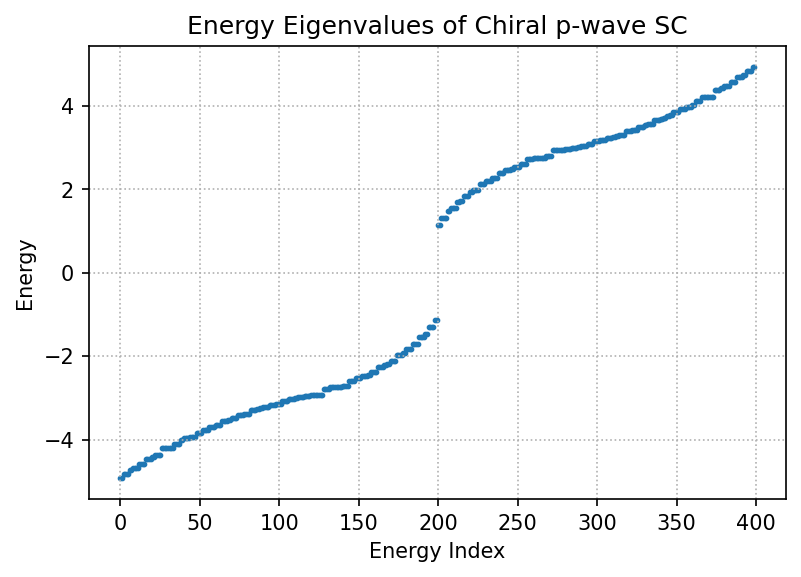

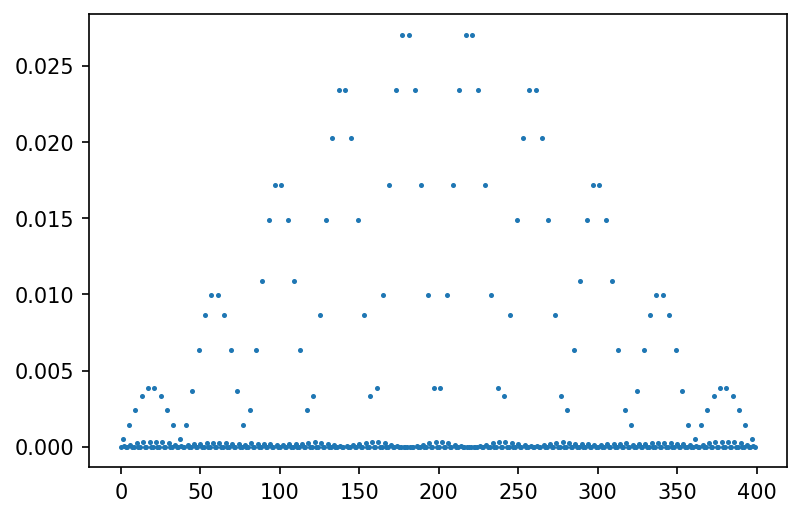

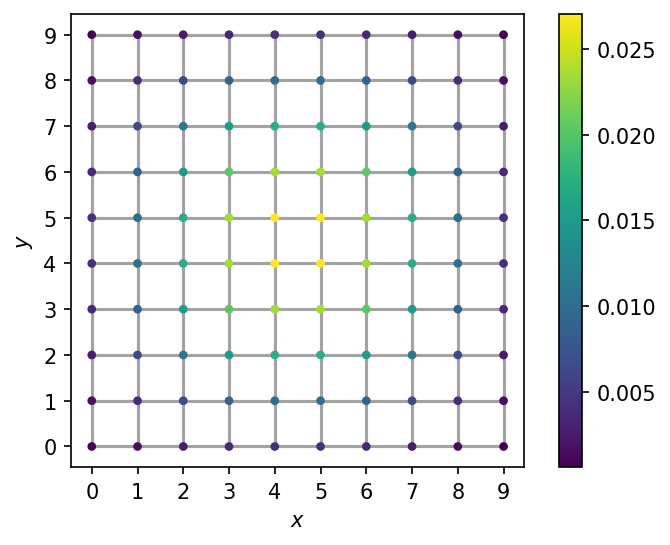

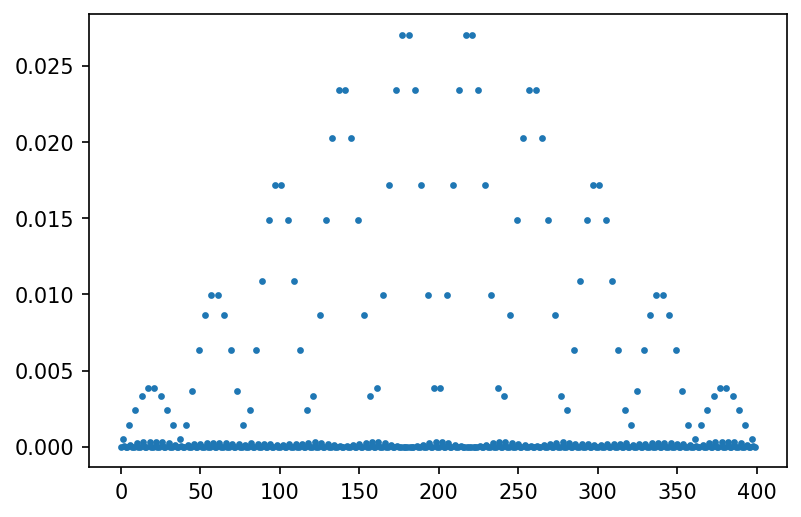

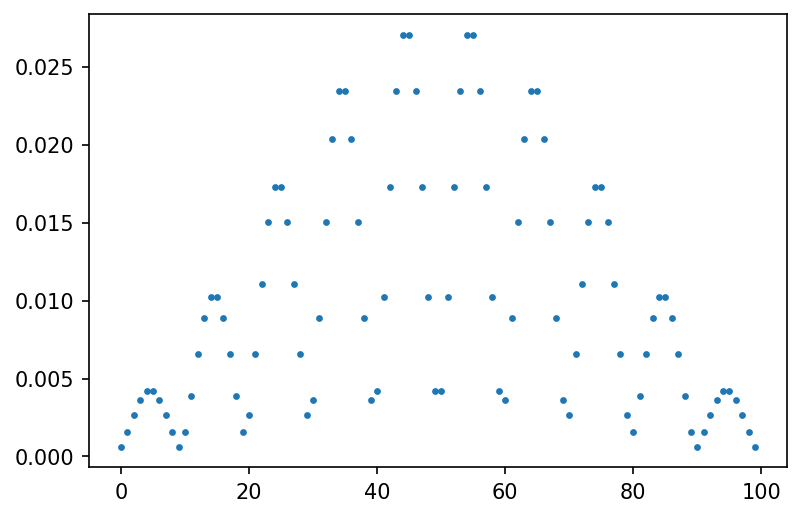

In [9]:
mu = 1.0
t = 1.0
delta = complex(1.0, 0.0)

dim_H_BdG = 4

Ham_constructor = HamiltonianConstructor(mu-4*t, t, t, delta)
H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
energies, states = scipy.linalg.eigh(H_direct_lattice)
print(energies[0:20])

print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)
plt.show()

gs_wave_function = states[:, gs_idx]
gs_probabilities_nambu = np.square(np.abs(gs_wave_function))

plt.scatter(range(len(gs_probabilities_nambu)), gs_probabilities_nambu, s=2)
plt.show()

gs_probabilities = np.zeros(shape=(num_sites, 1))
block_indices = [
    slice(block_idx * dim_H_BdG, (block_idx + 1) * dim_H_BdG)
    for block_idx in range(lattice.get_num_sites())
]

for site_idx in range(num_sites):
    gs_probabilities[site_idx] = np.sum(gs_probabilities_nambu[block_indices[site_idx]])

x_values = [k[0] for k in lattice_sites]
y_values = [k[1] for k in lattice_sites]

sc = lattice.plot(show_idx_bool=False, c=(gs_probabilities))
plt.colorbar(sc)
plt.show()
plt.scatter(range(len(gs_probabilities_nambu)), gs_probabilities_nambu, s=5)
plt.show()
plt.scatter(range(len(gs_probabilities)), gs_probabilities, s=5)
plt.show()